<a href="https://colab.research.google.com/github/Nikitoniy/Yandex_Data_Analysis/blob/main/4_%D0%A0%D1%8B%D0%BD%D0%BE%D0%BA_%D0%B7%D0%B0%D0%B2%D0%B5%D0%B4%D0%B5%D0%BD%D0%B8%D0%B9_%D0%BE%D0%B1%D1%89%D0%B5%D1%81%D1%82%D0%B2%D0%B5%D0%BD%D0%BD%D0%BE%D0%B3%D0%BE_%D0%BF%D0%B8%D1%82%D0%B0%D0%BD%D0%B8%D1%8F_%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D1%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Рынок заведений общественного питания Москвы

**Описание проекта:**

Необходимо подготовить исследование рынка Москвы, найти интересные особенности и презентовать полученные результаты, которые в будущем помогут в выборе подходящего инвесторам места.

Представлен датасет с заведениями общественного питания Москвы, составленный на основе данных сервисов Яндекс Карты и Яндекс Бизнес на лето 2022 года. Информация, размещённая в сервисе Яндекс Бизнес, могла быть добавлена пользователями или найдена в общедоступных источниках. Она носит исключительно справочный характер.


**Цель проекта:**

По ходу исследования необходимо проанализировать и предобработать первичные данные в таблице (проверка пустых значений, аномальных значений и дубликатов). В процессе предобработки буду добавлены новые колонки: наименование улицы, обозначение круглосуточного заведения, аббревиатура района Москвы. Далее необходимо проанализировать следующие характеристики заведений Москвы: средний чек, рейтинг, популярность районов и улиц Москвы. Необходимо отдельно рассмотреть кофейни, представленные в таблице для поиска интересных решений для открытия и предоставления рекомендаций к открытию кофейни.

**Описание данных в таблице moscow_places.csv:**   
- `name` — название заведения;
- `address` — адрес заведения;
- `category` — категория заведения, например «кафе», «пиццерия» или «кофейня»;
- `hours` — информация о днях и часах работы;
- `lat` — широта географической точки, в которой находится заведение;
- `lng` — долгота географической точки, в которой находится заведение;
- `rating` — рейтинг заведения по оценкам пользователей в Яндекс Картах (высшая оценка — 5.0);
- `price` — категория цен в заведении, например «средние», «ниже среднего», «выше среднего» и так далее;
- `avg_bill` — строка, которая хранит среднюю стоимость заказа в виде диапазона;
- `middle_avg_bill` — число с оценкой среднего чека, которое указано только для значений из столбца `avg_bill`, начинающихся с подстроки «Средний счёт»;
- `middle_coffee_cup` — число с оценкой одной чашки капучино, которое указано только для значений из столбца `avg_bill`, начинающихся с подстроки «Цена одной чашки капучино»;
- `chain` — число, выраженное 0 или 1, которое показывает, является ли заведение сетевым;
- `district` — административный район, в котором находится заведение, например Центральный административный округ;
- `seats` — количество посадочных мест.


## Изучение данных в датасете

### Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly import graph_objects as go
from folium import Map, Choropleth, Marker
from folium.plugins import MarkerCluster
import warnings

warnings.simplefilter('ignore')

#вывод всех колонок
pd.set_option('display.max_columns', 50)

In [2]:
import plotly.io as pio
pio.renderers.default = "jpeg"

### Просмотр данных в таблице

In [3]:
data = pd.read_csv('https://code.s3.yandex.net/datasets/moscow_places.csv')

display(data.head())
display(data.info())

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats
0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",55.878494,37.478860,5.0,NaN,NaN,NaN,NaN,0,NaN
1,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",55.875801,37.484479,4.5,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN,0,4.0
2,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",55.889146,37.525901,4.6,средние,Средний счёт:от 1000 ₽,1000.0,NaN,0,45.0
3,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",55.881608,37.488860,5.0,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0,0,NaN
4,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",55.881166,37.449357,5.0,средние,Средний счёт:400–600 ₽,500.0,NaN,1,148.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               8406 non-null   object 
 1   category           8406 non-null   object 
 2   address            8406 non-null   object 
 3   district           8406 non-null   object 
 4   hours              7870 non-null   object 
 5   lat                8406 non-null   float64
 6   lng                8406 non-null   float64
 7   rating             8406 non-null   float64
 8   price              3315 non-null   object 
 9   avg_bill           3816 non-null   object 
 10  middle_avg_bill    3149 non-null   float64
 11  middle_coffee_cup  535 non-null    float64
 12  chain              8406 non-null   int64  
 13  seats              4795 non-null   float64
dtypes: float64(6), int64(1), object(7)
memory usage: 919.5+ KB


None

**При первичном просмотре обнаружено:**

1. Всего значений в таблице 8406;
2. Несоотвествие типов данных в колонке `chain` - тип int - должен быть тип bool.
3. Замечено больше количество пропусков в таблице.

In [4]:
display('Количество уникальных названий заведений: {}'.format(data['name'].nunique()))

'Количество уникальных названий заведений: 5614'

**Промежуточный итог:** стоит отменить, что уникальные значения были рассмотрены только в рамках названий.

**Вывод:**

По итогам ознакомления было выявлено:
1. Несоответствия типов данных в колонке `chain`.
2. Уникальных названий заведений - 5614, в то время как всего значений в таблице - 8406.
    Это говорит о том, что в таблице, возможно, находятся: полные дубликаты; разные заведения, но с одинаковым названием; сетевые заведения (одинаковое название, разный адрес).
3. Большое количество пропусков в неекоторых колонках, необходимо принять решение по предобработке таких данных.

## Предобработка данных

### Изменение типов данных

In [5]:
#меняю на булево
data['chain'] = data['chain'].astype('bool')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               8406 non-null   object 
 1   category           8406 non-null   object 
 2   address            8406 non-null   object 
 3   district           8406 non-null   object 
 4   hours              7870 non-null   object 
 5   lat                8406 non-null   float64
 6   lng                8406 non-null   float64
 7   rating             8406 non-null   float64
 8   price              3315 non-null   object 
 9   avg_bill           3816 non-null   object 
 10  middle_avg_bill    3149 non-null   float64
 11  middle_coffee_cup  535 non-null    float64
 12  chain              8406 non-null   bool   
 13  seats              4795 non-null   float64
dtypes: bool(1), float64(6), object(7)
memory usage: 862.1+ KB


**Промежуточный итог:** колонка `chain` теперь имеет тип булево, колонка `seats` представлена целым числом.

### Предобработка категориальных значений

In [6]:
#цикл для категориальных значений
for col in ['name', 'category', 'address', 'hours', 'price', 'avg_bill']:
    #привожу к нижнему регистру
    data[col] = data[col].str.lower()
    #удаляю пробелы
    data[col] = data[col].str.strip()

data.head()

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats
0,wowфли,кафе,"москва, улица дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",55.878494,37.478860,5.0,NaN,NaN,NaN,NaN,False,NaN
1,четыре комнаты,ресторан,"москва, улица дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",55.875801,37.484479,4.5,выше среднего,средний счёт:1500–1600 ₽,1550.0,NaN,False,4.0
2,хазри,кафе,"москва, клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",55.889146,37.525901,4.6,средние,средний счёт:от 1000 ₽,1000.0,NaN,False,45.0
3,dormouse coffee shop,кофейня,"москва, улица маршала федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",55.881608,37.488860,5.0,NaN,цена чашки капучино:155–185 ₽,NaN,170.0,False,NaN
4,иль марко,пиццерия,"москва, правобережная улица, 1б",Северный административный округ,"ежедневно, 10:00–22:00",55.881166,37.449357,5.0,средние,средний счёт:400–600 ₽,500.0,NaN,True,148.0


### Изучение пропущенных данных

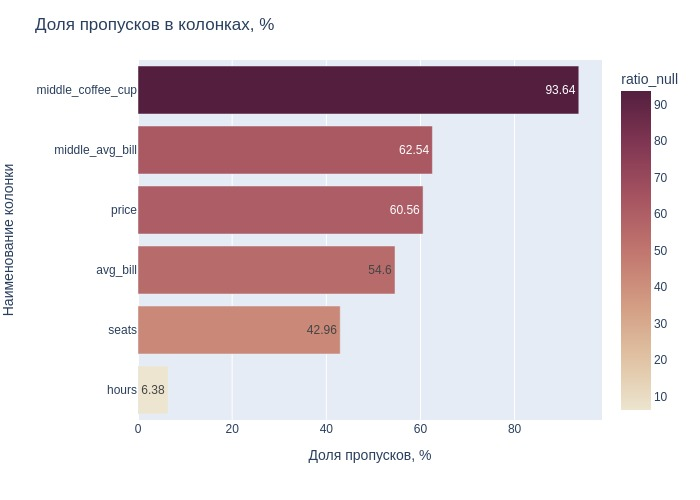

In [7]:
def ratio_null(df):
    #пустой список, который буду далее использовать
    new_list = []

    for column in df.columns:
        #доля пропусков в процентах
        ratio_perc = round(((df[column].isnull().sum() / len(data)) * 100), 2)
        #добавляю колонку + долю пропусков
        new_list.append((column, ratio_perc))


    new_df = pd.DataFrame(new_list, columns=['name_column', 'ratio_null'])
    #создание таблицы + убираю значения меньше нуля
    new_df = new_df.query('ratio_null > 0')
    fig = px.bar(new_df.sort_values('ratio_null', ascending=True),
                #значение по у
                y='name_column',
                #значение по х
                x='ratio_null',
                #аргумент для добавления значений
                text='ratio_null',
                #аругмент для выбора цвета
                color='ratio_null',
                #цвет
                color_continuous_scale=px.colors.sequential.Brwnyl
                )
    fig.update_layout(title='Доля пропусков в колонках, %',
                   xaxis_title='Доля пропусков, %',
                   yaxis_title='Наименование колонки')

    fig.show()
    #return new_df



ratio_null(data)

**Промежуточный итог:** доля пропусков в колонках достигает 90%. Думаю, это связано с особенностями таблицы, как, например, в колонке `middle_coffee_cup` - данная колонка заполняется в случае заполненных значений колонки `avg_bill`, начинающихся с подстроки «Цена одной чашки капучино».

Также нужно отметить, что все данные заполняется исключительно пользователями или через общедоступные источники (автоматического заполнения системой нет), поэтому будет сложно заменить такие значения на средние или какие-либо другие.

Доля пустых значений в колонках составляет:
- `middle_coffee_cup` - 93%;
- `middle_avg_bill` - 62%;
- `price` - 60%;
- `avg_vill` - 54%;
- `seats` - 42%;
- `hours`- 6%.
    


### Анализ дубликатов

#### Для начала посмотрим на количество дубликатов в таблице с различными условиями.

In [8]:
display('Полных дубликатов в датасете: {}'.format(data.duplicated().sum()))
display('Дубликатов названий заведений: {}'
        .format(data[data.duplicated(subset=['name'], keep=False)]['name'].count()))
display('Дубликатов в связке названий и адреса заведения: {}'
        .format(data[data.duplicated(subset=['name', 'address'], keep=False)]['name'].count()))
display('Дубликатов в связке названий и категории заведения: {}'
        .format(data[data.duplicated(subset=['name', 'category'], keep=False)]['name'].count()))
display('Дубликатов в связке названий, категории и адреса заведения: {}'
        .format(data[data.duplicated(subset=['name', 'category', 'address'], keep=False)]['name'].count()))
display('Дубликатов в связке названий, категории и координат заведения: {}'
        .format(data[data.duplicated(subset=['name', 'category', 'lat', 'lng'], keep=False)]['name'].count()))

'Полных дубликатов в датасете: 0'

'Дубликатов названий заведений: 3646'

'Дубликатов в связке названий и адреса заведения: 8'

'Дубликатов в связке названий и категории заведения: 3033'

'Дубликатов в связке названий, категории и адреса заведения: 4'

'Дубликатов в связке названий, категории и координат заведения: 2'

**Промежуточный итог:** Полностью дублирующих друг друга строк не обнаружено. Далее рассмотрим другие дубликаты.

#### Рассмотрим дубликаты в части названия заведений

Приступим сразу к рассмотрению несетевых заведений, так как сетевые места могут иметь одно и то же и название, и категорию.

In [9]:
#ищу дубликаты в части названия, убираю несетевые места, сортирую по названию
(
    data[data.duplicated(subset=['name'], keep=False)]
    .query('chain == False')
    .sort_values('name')
)

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats
1442,abc coffee roasters,кофейня,"москва, ленинградский проспект, 72, корп. 1",Северный административный округ,"пн-пт 08:00–22:00; сб,вс 10:00–22:00",55.805547,37.520395,4.5,средние,цена чашки капучино:220–270 ₽,NaN,245.0,False,625.0
6371,bb grill,"бар,паб","москва, автозаводская улица, 18",Южный административный округ,"ежедневно, 10:00–23:00",55.705429,37.641989,4.4,выше среднего,средний счёт:1700 ₽,1700.0,NaN,False,455.0
2694,bb grill,"бар,паб","москва, семёновская площадь, 1",Восточный административный округ,"ежедневно, 12:00–23:00",55.782891,37.720496,4.6,высокие,средний счёт:1500–2500 ₽,2000.0,NaN,False,100.0
7365,burger club,ресторан,"москва, улица борисовские пруды, 26",Южный административный округ,"ежедневно, 10:00–22:00",55.639785,37.758672,4.3,NaN,средний счёт:250–500 ₽,375.0,NaN,False,5.0
3405,carrots and beans,кофейня,"москва, малая грузинская улица, 38",Центральный административный округ,"ежедневно, 08:00–21:00",55.768116,37.572662,4.4,выше среднего,средний счёт:1000–1500 ₽,1250.0,NaN,False,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5982,шашлычная,"бар,паб","москва, новочерёмушкинская улица, 12",Юго-Западный административный округ,"ежедневно, 11:00–23:00",55.686640,37.583504,4.3,средние,NaN,NaN,NaN,False,30.0
6516,шашлычная,кафе,"москва, заозёрная улица, 14",Восточный административный округ,"ежедневно, 09:00–21:00",55.716498,37.847963,4.4,NaN,NaN,NaN,NaN,False,NaN
5548,шашлычная,кафе,"москва, авиамоторная улица, 39",Юго-Восточный административный округ,"ежедневно, круглосуточно",55.755822,37.716738,3.8,NaN,NaN,NaN,NaN,False,NaN
530,шашлычная,быстрое питание,"москва, кронштадтский бульвар, 3, стр. 1",Северный административный округ,"ежедневно, 09:00–00:00",55.839444,37.486533,4.0,NaN,NaN,NaN,NaN,False,226.0


Видимо, дубликаты названий возникают из-за их "простоты", такие дубликаты можно не предобрабатывать.

Далее рассмотрим дубликаты в связке названий и категорий.

In [10]:
#ищу дубликаты в части названия и категории, убираю несетевые места, сортирую по категории
(
    data[data.duplicated(subset=['name', 'category'], keep=False)]
    .query('chain == False')
    .sort_values('category')
)

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats
2694,bb grill,"бар,паб","москва, семёновская площадь, 1",Восточный административный округ,"ежедневно, 12:00–23:00",55.782891,37.720496,4.6,высокие,средний счёт:1500–2500 ₽,2000.0,NaN,False,100.0
6347,авлабар,"бар,паб","москва, велозаводская улица, 6а",Южный административный округ,"пн-пт 11:00–23:00; сб,вс 12:00–23:00",55.711697,37.665215,4.4,высокие,средний счёт:1500–2000 ₽,1750.0,NaN,False,NaN
6371,bb grill,"бар,паб","москва, автозаводская улица, 18",Южный административный округ,"ежедневно, 10:00–23:00",55.705429,37.641989,4.4,выше среднего,средний счёт:1700 ₽,1700.0,NaN,False,455.0
108,кафе,"бар,паб","москва, мкад, 82-й километр, вл18",Северо-Восточный административный округ,NaN,55.908930,37.558777,4.2,NaN,NaN,NaN,NaN,False,NaN
899,мск lounge,"бар,паб","москва, ярославское шоссе, 111",Северо-Восточный административный округ,"пн-пт 11:00–05:00; сб,вс 12:00–05:00",55.870235,37.709482,4.4,средние,средний счёт:1000–1200 ₽,1100.0,NaN,False,300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5711,столовая,столовая,"москва, проспект вернадского, 12д",Западный административный округ,"ежедневно, 08:00–01:00",55.686030,37.511410,4.8,средние,средний счёт:от 250 ₽,250.0,NaN,False,30.0
2507,столовая,столовая,"москва, улица сокольнический вал, 17",Восточный административный округ,NaN,55.792035,37.672594,3.8,NaN,NaN,NaN,NaN,False,8.0
543,столовая,столовая,"москва, беломорская улица, 40",Северный административный округ,"ежедневно, круглосуточно",55.866522,37.483022,4.0,средние,средний счёт:250–400 ₽,325.0,NaN,False,40.0
5440,столовая,столовая,"москва, кетчерская улица, 13с2",Восточный административный округ,пн-пт 08:00–17:30; сб 09:00–16:30,55.746021,37.838445,4.1,NaN,средний счёт:200–400 ₽,300.0,NaN,False,NaN


Такая же ситуация и с дубликатами названий и категорий.

#### Дубликаты в части названи, категорий и адреса/координат

Таких дубликатов всего 4, рассмотрим таблицу с такими дубликатами

In [11]:
data[data.duplicated(subset=['name', 'category', 'address'], keep=False)]

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats
189,кафе,кафе,"москва, парк ангарские пруды",Северный административный округ,"ежедневно, 09:00–23:00",55.880327,37.530786,3.2,NaN,NaN,NaN,NaN,False,NaN
215,кафе,кафе,"москва, парк ангарские пруды",Северный административный округ,"ежедневно, 10:00–22:00",55.881438,37.531848,3.2,NaN,NaN,NaN,NaN,False,NaN
1430,more poke,ресторан,"москва, волоколамское шоссе, 11, стр. 2",Северный административный округ,"ежедневно, 09:00–21:00",55.806307,37.497566,4.2,NaN,NaN,NaN,NaN,False,188.0
1511,more poke,ресторан,"москва, волоколамское шоссе, 11, стр. 2",Северный административный округ,"пн-чт 09:00–18:00; пт,сб 09:00–21:00; вс 09:00...",55.806307,37.497566,4.2,NaN,NaN,NaN,NaN,True,188.0


Перед нами таблица, в которой "Кафе" повторяют название, категорию и адрес, но разные коордитаны. Здесь адресом выступает целый парк. Оценки одинаковые, возможно, это говорит о маленькой открытой сети в парке, поэтому такие значения удалять не будем.

Далее идут рестораны "More poke" с одинаковыми названиями, категорией, адресом и координатами, а также оценкой и посадочными местами. Перед удалением одного из значений, проверим, дейстивтельно ли ресторан - сеть?

In [12]:
data.query('name == "more poke"')

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats
1430,more poke,ресторан,"москва, волоколамское шоссе, 11, стр. 2",Северный административный округ,"ежедневно, 09:00–21:00",55.806307,37.497566,4.2,NaN,NaN,NaN,NaN,False,188.0
1511,more poke,ресторан,"москва, волоколамское шоссе, 11, стр. 2",Северный административный округ,"пн-чт 09:00–18:00; пт,сб 09:00–21:00; вс 09:00...",55.806307,37.497566,4.2,NaN,NaN,NaN,NaN,True,188.0
6088,more poke,ресторан,"москва, духовской переулок, 19",Южный административный округ,"ежедневно, 10:00–22:00",55.704177,37.612889,4.4,NaN,NaN,NaN,NaN,True,NaN


Данных мало, но из трех заведений, два являются сетью, поэтому можно удалить несетевой ресторан "More poke".

Одна строка занимает менее 1% данных от всего датасета, поэтому спокойно удаляем.

In [13]:
#удаляю строку
data = data.drop(data.index[1430])

#проверка
data.query('name == "more poke"')

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats
1511,more poke,ресторан,"москва, волоколамское шоссе, 11, стр. 2",Северный административный округ,"пн-чт 09:00–18:00; пт,сб 09:00–21:00; вс 09:00...",55.806307,37.497566,4.2,NaN,NaN,NaN,NaN,True,188.0
6088,more poke,ресторан,"москва, духовской переулок, 19",Южный административный округ,"ежедневно, 10:00–22:00",55.704177,37.612889,4.4,NaN,NaN,NaN,NaN,True,NaN


С учетом того, что дубликат в части наименования, адреса и координат был удален, все равно проверим такие значения.

In [14]:
data[data.duplicated(subset=['name', 'category', 'lat', 'lng'], keep=False)]

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats


Ожидаемо, таких дубликатов больше нет.

**Промежуточный итог:** в датасете отсутсвуют полностью дублирующие друг друга строки.

Найденные дубликаты:
- Дубликаты названий заведений: 3506;
- Дубликатов в связке названий и категории заведения: 2933;
- Дубликаты в связке названия, категории и адреса заведения: 4;
- Дубликаты в связке названия, категории и координат заведения: 2.

Было найдено 2 дублирующиеся строки, из них кафе с наименованием "Кафе" больше похоже на сеть кафе в одном и том же парке (у них разные координаты), а другие строки были предобработаны - удалена строка с наименованием ресторана "More poke".

Стоит отметить, что в таблице присутсвуют "простые" названия заведений, например, "Столовая" или "Шаурма", из-за чего возникают дубликаты в части названий заведений.

Данные дубликаты никак не предобработаны, так как такие данные важны для последующего анализа.



### Аномальные значения

#### Колонка `rating`

In [15]:
data['rating'].describe()

count    8405.000000
mean        4.229899
std         0.470376
min         1.000000
25%         4.100000
50%         4.300000
75%         4.400000
max         5.000000
Name: rating, dtype: float64

Минимальная оценка 1, максимальная - 5! Аномальных значений не обнаружено.

#### Колонка `middle_avg_bill`

count     3149.000000
mean       958.053668
std       1009.732845
min          0.000000
25%        375.000000
50%        750.000000
75%       1250.000000
max      35000.000000
Name: middle_avg_bill, dtype: float64

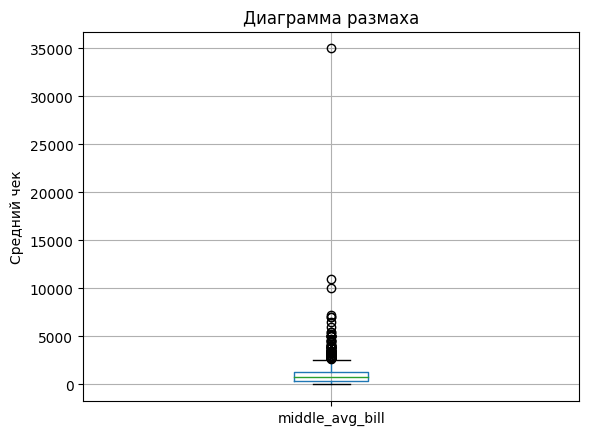

In [16]:
display(data['middle_avg_bill'].describe())

data.boxplot(column='middle_avg_bill')
plt.title('Диаграмма размаха')
plt.ylabel('Средний чек')
plt.show()

Сильно выделяются значения больше 10000, а также есть значение 0. Стоит рассмотреть отдельно.

In [17]:
data.query('middle_avg_bill >= 10000 or middle_avg_bill == 0')

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats
730,чойхона,"бар,паб","москва, дмитровское шоссе, 95а",Северный административный округ,"ежедневно, 10:00–23:00",55.871497,37.543555,4.4,высокие,средний счёт:5000–17000 ₽,11000.0,NaN,False,49.0
3688,кофемания,кофейня,"москва, улица новый арбат, 19",Центральный административный округ,"ежедневно, круглосуточно",55.752136,37.587784,4.5,высокие,средний счёт:от 0 ₽,0.0,NaN,True,200.0
5481,гости,ресторан,"москва, шоссе энтузиастов, 52",Восточный административный округ,"пн,вс 18:00–22:30",55.759088,37.760570,4.1,высокие,средний счёт:5000–15000 ₽,10000.0,NaN,False,NaN
7177,кафе,ресторан,"москва, каширское шоссе, 23, стр. 2",Южный административный округ,"ежедневно, круглосуточно",55.657450,37.646665,4.1,высокие,средний счёт:20000–50000 ₽,35000.0,NaN,False,100.0


Проблема заведений с высоким средним счетом в большом разбросе значений.

А в Кофемании высокие цены при среднем от 0, судя по таблице.

Такие значения можно убрать из таблицы, так как они могут искозить дальнейший анализ.

In [18]:
#добавляю в поиск пустые значения, чтобы не потерять большое колво данных
data = data.query('(middle_avg_bill < 10000 and middle_avg_bill > 0) or middle_avg_bill.isna()')

#проверка колонок
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8401 entries, 0 to 8405
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               8401 non-null   object 
 1   category           8401 non-null   object 
 2   address            8401 non-null   object 
 3   district           8401 non-null   object 
 4   hours              7865 non-null   object 
 5   lat                8401 non-null   float64
 6   lng                8401 non-null   float64
 7   rating             8401 non-null   float64
 8   price              3311 non-null   object 
 9   avg_bill           3812 non-null   object 
 10  middle_avg_bill    3145 non-null   float64
 11  middle_coffee_cup  535 non-null    float64
 12  chain              8401 non-null   bool   
 13  seats              4791 non-null   float64
dtypes: bool(1), float64(6), object(7)
memory usage: 927.1+ KB


#### Колонка `middle_coffee_cup`

count     535.000000
mean      174.721495
std        88.951103
min        60.000000
25%       124.500000
50%       169.000000
75%       225.000000
max      1568.000000
Name: middle_coffee_cup, dtype: float64

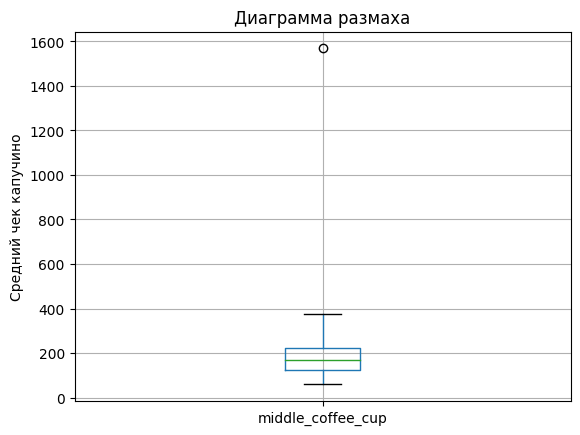

In [19]:
display(data['middle_coffee_cup'].describe())

data.boxplot(column='middle_coffee_cup')
plt.title('Диаграмма размаха')
plt.ylabel('Средний чек капучино')
plt.show()

Рассмотрим наивысшую цену кофе в таблице.

In [20]:
data.query('middle_coffee_cup == 1568')

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats
2859,шоколадница,кофейня,"москва, большая семёновская улица, 27, корп. 1",Восточный административный округ,"ежедневно, 08:00–23:00",55.782268,37.709022,4.2,средние,цена чашки капучино:230–2907 ₽,NaN,1568.0,True,48.0


Та же проблема, что и со средним чеком - высокий разброс цен. Такую строку можно удалить.

In [21]:
data = data.query('middle_coffee_cup != 1568')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8400 entries, 0 to 8405
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               8400 non-null   object 
 1   category           8400 non-null   object 
 2   address            8400 non-null   object 
 3   district           8400 non-null   object 
 4   hours              7864 non-null   object 
 5   lat                8400 non-null   float64
 6   lng                8400 non-null   float64
 7   rating             8400 non-null   float64
 8   price              3310 non-null   object 
 9   avg_bill           3811 non-null   object 
 10  middle_avg_bill    3145 non-null   float64
 11  middle_coffee_cup  534 non-null    float64
 12  chain              8400 non-null   bool   
 13  seats              4790 non-null   float64
dtypes: bool(1), float64(6), object(7)
memory usage: 927.0+ KB


#### Колонка `seats`

count    4790.000000
mean      108.412735
std       122.878835
min         0.000000
25%        40.000000
50%        75.000000
75%       140.000000
max      1288.000000
Name: seats, dtype: float64

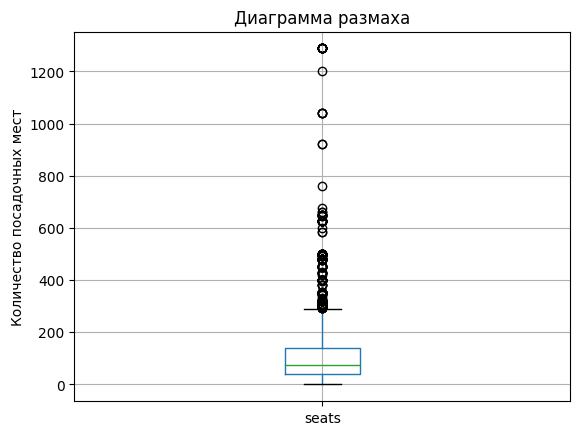

In [22]:
display(data['seats'].describe())

data.boxplot(column='seats')
plt.title('Диаграмма размаха')
plt.ylabel('Количество посадочных мест')
plt.show()

Проверим значения больше 600.

In [23]:
data.query('seats > 600')

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats
1326,нам,"бар,паб","москва, ленинградский проспект, 69, стр. 1",Северный административный округ,"ежедневно, 11:00–21:00",55.803236,37.517898,4.2,NaN,NaN,NaN,NaN,True,625.0
1351,максима пицца,пиццерия,"москва, ленинградский проспект, 78, корп. 1",Северный административный округ,"пн-пт 09:00–00:00; сб,вс 10:00–00:00",55.805807,37.513994,4.3,выше среднего,средний счёт:1500–1800 ₽,1650.0,NaN,False,625.0
1355,страдивари,ресторан,"москва, ленинградский проспект, 77, корп. 1",Северный административный округ,"ежедневно, 11:00–23:00",55.804980,37.509454,4.2,выше среднего,средний счёт:1000–2000 ₽,1500.0,NaN,True,625.0
1367,академия,пиццерия,"москва, ленинградский проспект, 72, корп. 1",Северный административный округ,"пн-пт 09:00–23:00; сб,вс 11:00–23:00",55.805579,37.520086,4.2,средние,средний счёт:1000–1200 ₽,1100.0,NaN,True,625.0
1380,север-метрополь,кофейня,"москва, ленинградский проспект, 75, корп. 1",Северный административный округ,"ежедневно, 09:00–21:00",55.804940,37.512423,4.6,NaN,NaN,NaN,NaN,True,625.0
1385,чайхона на соколе,кафе,"москва, ленинградский проспект, 69, стр. 1",Северный административный округ,"ежедневно, 08:00–23:00",55.803236,37.517931,4.3,средние,средний счёт:400–800 ₽,600.0,NaN,False,625.0
1393,кулинарная лавка братьев караваевых,кафе,"москва, ленинградский проспект, 72, корп. 1",Северный административный округ,"ежедневно, 08:00–23:00",55.805791,37.520339,4.3,NaN,средний счёт:500–800 ₽,650.0,NaN,True,625.0
1442,abc coffee roasters,кофейня,"москва, ленинградский проспект, 72, корп. 1",Северный административный округ,"пн-пт 08:00–22:00; сб,вс 10:00–22:00",55.805547,37.520395,4.5,средние,цена чашки капучино:220–270 ₽,NaN,245.0,False,625.0
1446,9 bar coffee,кофейня,"москва, ленинградский проспект, 80, корп. 1",Северный административный округ,"пн-пт 07:30–21:00; сб,вс 07:30–19:00",55.810352,37.506625,4.3,NaN,цена чашки капучино:60–150 ₽,NaN,105.0,True,625.0
1464,находка,ресторан,"москва, ленинградский проспект, 74, корп. 1",Северный административный округ,"ежедневно, 09:00–22:00",55.804972,37.517319,4.9,NaN,NaN,NaN,NaN,True,625.0


In [24]:
display('Доля аномальных значений: {}'.
        format(round((data.query('seats > 600')['name'].count() / len(data))*100,2)))

'Доля аномальных значений: 0.63'

Такие значения составляют менее 5%, поэтому удаляем.

In [25]:
data = data.query('seats < 600 or seats.isna()')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8346 entries, 0 to 8405
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               8346 non-null   object 
 1   category           8346 non-null   object 
 2   address            8346 non-null   object 
 3   district           8346 non-null   object 
 4   hours              7817 non-null   object 
 5   lat                8346 non-null   float64
 6   lng                8346 non-null   float64
 7   rating             8346 non-null   float64
 8   price              3290 non-null   object 
 9   avg_bill           3788 non-null   object 
 10  middle_avg_bill    3128 non-null   float64
 11  middle_coffee_cup  528 non-null    float64
 12  chain              8346 non-null   bool   
 13  seats              4736 non-null   float64
dtypes: bool(1), float64(6), object(7)
memory usage: 921.0+ KB


**Вывод:** были проанализированы количественные значения в датасете.

Были выявлены и удалены аномальные значения в колонках:
- `middle_avg_bill` менее 0.1%;
- `middle_coffee_cup` менее 0.1%;
- `seats` 0.6%.

### Добавление новых колонок в таблицу

Добавим новые колонки:
- название улицы из адреса заведения;
- обозначение круглосуточного заведения;
- аббревиатуры для обозначения административных округов.

In [26]:
#разбиваю адрес на список, где разделяю значения по знаку ",", далее беру второе значение из списка
data['street'] = data['address'].str.split(',').str[1]

#если значение равно "ежедневно, круглосуточно", тогда Истина, в остальных случаях ложь
data['is_24/7'] = np.where(data['hours'] == 'ежедневно, круглосуточно', True, False)


def for_dist(phrase):
    #разделяю на список
    phrase = phrase.replace('-', ' ').split()
    #формирование аббревиатуры
    acronym = ""
    for word in phrase:
        #формирую аббревиатуру с помощью первой буквы списка
        acronym = acronym + word[0].upper()
    return acronym

data['dist_abbrev'] = data['district'].apply(for_dist)

data['street'] = data['street'].str.strip()

data[data['is_24/7'] == True].head()

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats,street,is_24/7,dist_abbrev
10,great room bar,"бар,паб","москва, левобережная улица, 12",Северный административный округ,"ежедневно, круглосуточно",55.877832,37.469171,4.5,средние,цена бокала пива:250–350 ₽,NaN,NaN,False,102.0,левобережная улица,True,САО
17,чайхана беш-бармак,ресторан,"москва, ленинградское шоссе, 71б, стр. 2",Северный административный округ,"ежедневно, круглосуточно",55.876908,37.449876,4.4,средние,средний счёт:350–500 ₽,425.0,NaN,False,96.0,ленинградское шоссе,True,САО
19,пекарня,булочная,"москва, ижорский проезд, 5",Северный административный округ,"ежедневно, круглосуточно",55.887969,37.515688,4.4,NaN,NaN,NaN,NaN,True,NaN,ижорский проезд,True,САО
24,drive café,кафе,"москва, улица дыбенко, 9ас1",Северный административный округ,"ежедневно, круглосуточно",55.879992,37.481571,4.0,NaN,NaN,NaN,NaN,True,NaN,улица дыбенко,True,САО
49,2u-ту-ю,пиццерия,"москва, ижорская улица, 8а",Северный административный округ,"ежедневно, круглосуточно",55.886160,37.508784,2.7,NaN,средний счёт:900 ₽,900.0,NaN,False,NaN,ижорская улица,True,САО


**Промежуточный итог:**

в таблицу были добавлены новые колонки:
- название улицы заведения;
- обозначние круглосуточного заведения;
- аббревиатуры для обозначения административных округов.

In [27]:
data[data['street'] == 'проспект мира'].head(1)

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats,street,is_24/7,dist_abbrev
718,все лень,ресторан,"москва, проспект мира, 119, стр. 528",Северо-Восточный административный округ,"пн-чт 12:00–21:00; пт,сб 12:00–22:00; вс 12:00...",55.836107,37.614875,4.4,выше среднего,средний счёт:от 1500 ₽,1500.0,NaN,False,NaN,проспект мира,False,СВАО


**Вывод:**

В ходе предобработки данных выполнено:
1. Изменены типы данных в колонках;
2. Изучены и проанализированы пропуски в колонках;
3. Проанализированы всевозможные дубликаты в таблице. Полных дубликатов не найдено;
4. По всем количественным значениям были предобработаны данные в части аномальных значениях. Вся предобработка заняла ~0.8%;
5. Добавлены новые колонки в таблицу.

## Анализ данных

### Распределение заведений по категориям

In [28]:
#цвет для каждой категории
colors_category = {'кафе': '#ce917d','ресторан': '#77314e','кофейня': '#aa5750',
                  'быстрое питание': '#c8bb8E','пиццерия': '#ca5a4f','бар,паб': '#341d43',
                  'столовая': '#ec7e6b','булочная': '#ec835c'}

#проверка уникальных значений
data['category'].unique()

array(['кафе', 'ресторан', 'кофейня', 'пиццерия', 'бар,паб',
       'быстрое питание', 'булочная', 'столовая'], dtype=object)

Всего в датасет входят 8 категорий, из них:
1. кафе;
2. ресторан;
3. кофейня;
4. пиццерия;
5. бар, паб;
6. быстрое питание;
7. булочная;
8. столовая.

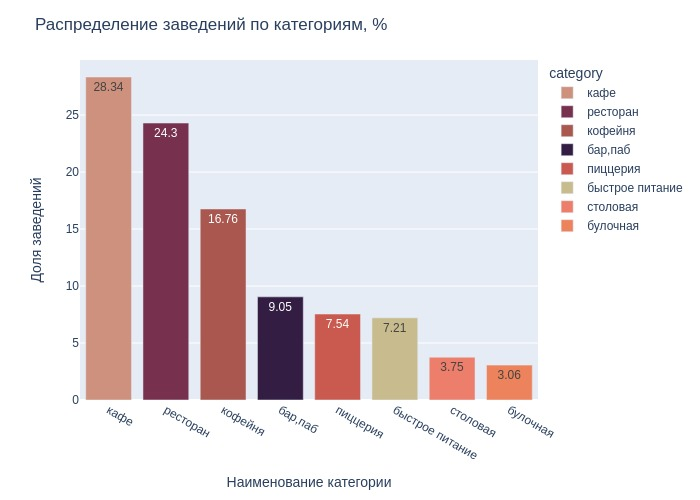

In [29]:
#создаю отдельную таблицу с названием категории и подсчетом ее в таблице
category_pv = data.pivot_table(index='category', values='name', aggfunc='count')
category_pv.reset_index(inplace=True)


category_pv = category_pv.sort_values('name', ascending=False)

category_pv['ratio'] = round((category_pv['name'] / category_pv['name'].sum())*100, 2)

#создаю график в котором отображаю самое популярное место
fig_ci = px.bar(
                category_pv,
                x='category',
                y='ratio',
                text='ratio',
                color='category',
                color_discrete_map=colors_category
                )

fig_ci.update_layout(title='Распределение заведений по категориям, %',
                    xaxis_title='Наименование категории',
                    yaxis_title='Доля заведений')
fig_ci.show()

**Промежуточный итог:** был построен график, на основе него можно увидеть доли распределения категорий в таблице.

Всего в датасет входят 8 категорий, из них:
1. кафе - 2365 заведений;
2. ресторан - 2029 заведений;
3. кофейня - 1399 заведений;
4. бар, паб - 755 заведений;
5. пиццерия - 629 заведений;
6. быстрое питание - 602 заведений;
7. столовая - 313 заведений;
8. булочная - 255 заведений.

Самые популярные заведения - кафе, рестораны и кофейни. Данные заведения сильно отрываются по количество от остальных.

### Количество посадочных мест в местах по категориям

Создам новую таблицу, чтобы присвоить категории по количеству мест

In [30]:
data_seats = data

data_seats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8346 entries, 0 to 8405
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               8346 non-null   object 
 1   category           8346 non-null   object 
 2   address            8346 non-null   object 
 3   district           8346 non-null   object 
 4   hours              7817 non-null   object 
 5   lat                8346 non-null   float64
 6   lng                8346 non-null   float64
 7   rating             8346 non-null   float64
 8   price              3290 non-null   object 
 9   avg_bill           3788 non-null   object 
 10  middle_avg_bill    3128 non-null   float64
 11  middle_coffee_cup  528 non-null    float64
 12  chain              8346 non-null   bool   
 13  seats              4736 non-null   float64
 14  street             8346 non-null   object 
 15  is_24/7            8346 non-null   bool   
 16  dist_abbrev        8346 

Добавим к каждым категориям заведения категории посадочных мест

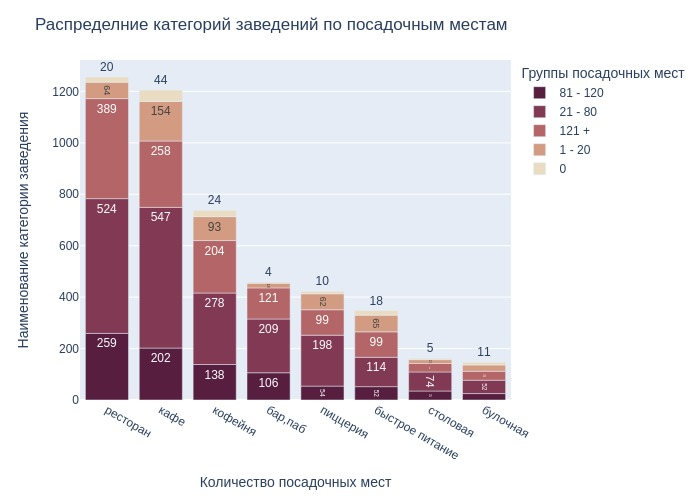

In [31]:
def categorization_seats(seat):
    #проверяю значение на пустое,
    #далее распределяю по группам

    if (seat != seat):
        return np.nan
    seat = int(seat)
    if (seat == 0):
        return '0'
    elif (seat <= 20):
        return '1 - 20'
    elif (seat <= 80):
        return '21 - 80'
    elif (seat <= 120):
        return '81 - 120'
    else:
        return '121 +'

data_seats['seats_category'] = data_seats['seats'].apply(categorization_seats)

#сгруппировал сначала по категории, потом по посадочным местам, далее считаю и сортирую

data_seats = (data_seats
                    .groupby(['category', 'seats_category'], as_index=False)
                    .agg(count=('category', 'count'))
             )

#табличка с полной суммой

x = data_seats.pivot_table(index='category', values='count', aggfunc='sum')
x.reset_index(inplace=True)
x.columns = ['category', 'sum']

#присоединяю полную сумму, чтобы по ней отсортировать

data_seats = data_seats.merge(x, on='category', how='left')
data_seats = data_seats.sort_values('sum', ascending=False)

data_seats_bar = px.bar(
                        data_seats,
                        x='category',
                        y='count',
                        color='seats_category',
                        text='count',
                        color_discrete_map = {'0':'#e9dcc3',
                                             '1 - 20':'#d29b82',
                                             '121 +':'#b46568',
                                             '21 - 80':'#813954',
                                             '81 - 120':'#571e40'}
                        )

#создаю график, в котором отображаю подсчитанные группы посадочных мест

data_seats_bar.update_layout(title='Распределние категорий заведений по посадочным местам',
                             legend_title='Группы посадочных мест',
                             xaxis_title='Количество посадочных мест',
                             yaxis_title='Наименование категории заведения')
data_seats_bar.show()

**Промежуточный итог:**

Для анализа количества посадочных мест было принято решение разбить их на группы:
- 0 - отсутсвие посадочных мест;
- 1-20 - заведение маленького размера;
- 21-80 - заведение среднего размера;
- 81-120 - заведение большого размера;
- 120+ - очень большие заведения.

График отражает группы по количеству посадочных мест в зависимости от категории заведения. Исходя из графика можно сделать вывод, наиболее часто встречающиеся места **среднего размера** и **очень большого размера**

Чаще встречаются встречаются места среднего размера (во всех категориях), думаю это связано с их расположенностью, то есть, может быть заведения расположены на площади, где посадочные места общие (например, фуд-корт).

Далее можно увидеть закономерность: со снижением количества посадочных мест убывает количество представленных заведений в таблице.

### Сетевые и несетевые заведения

#### Построим соотношение сетевых и несетевых мест

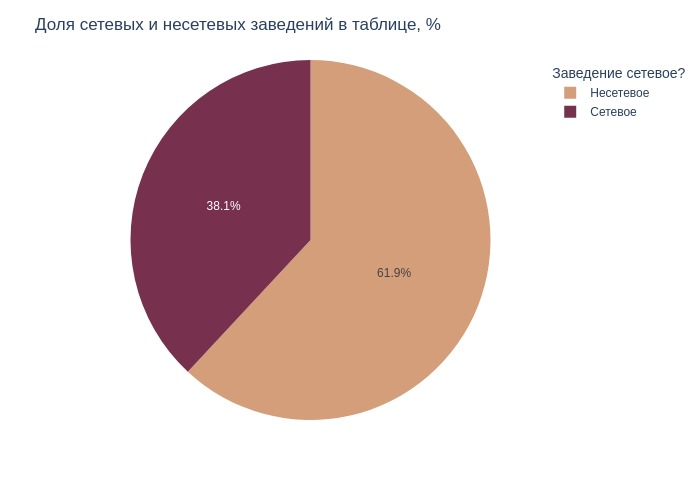

In [32]:
data_chain_pv = data.pivot_table(index='chain', values='name', aggfunc='count')
data_chain_pv.reset_index(inplace=True)
data_chain_pv['chain'] = data_chain_pv['chain'].replace(True,'Сетевое').replace(False,'Несетевое')
data_chain_bar = px.pie(data_chain_pv,
                names='chain',
                values='name',
                color='chain',
                color_discrete_map={'Сетевое':'77314e',
                                    'Несетевое':'#d59e7b'}
                )
data_chain_bar.update_layout(title='Доля сетевых и несетевых заведений в таблице, %',
                             legend_title='Заведение сетевое?'
                            )

data_chain_bar.show()

**Промежуточный итог:**
На графике видно явное превосхождение несетевых мест, почти в 2 раза!

Сетевых мест - 3177, несетевых - 5170.

Далее стоит рассмотреть в разрезе категорий заведений.

#### Построим соотношение сетевых и несетевых мест в разрезе категорий

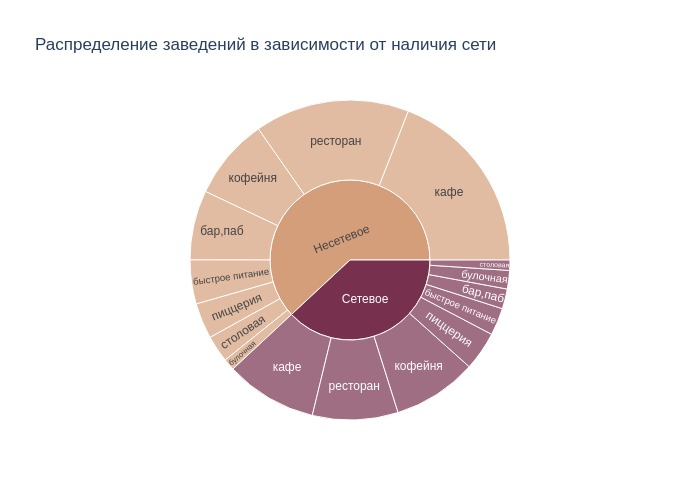

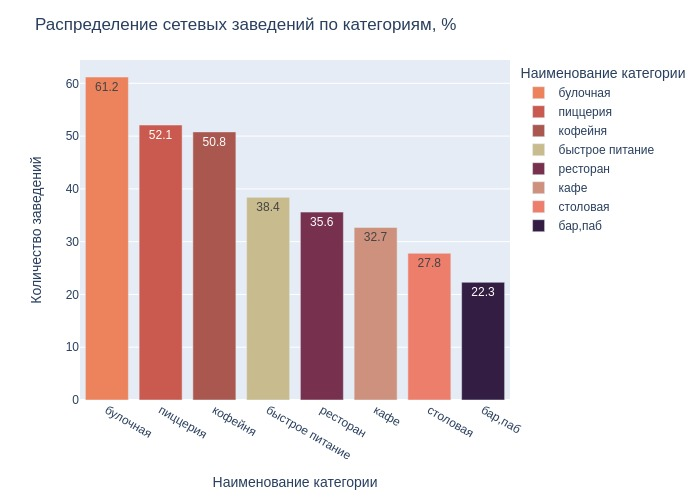

In [33]:
data_chain_gr = (data
                    .groupby(['category', 'chain'], as_index=False)
                    .agg(count=('category', 'count'))
                    .sort_values('count', ascending=False)
                    .replace([True,False],['Сетевое','Несетевое'])
                )

data_chain_pie = px.sunburst(
                            data_chain_gr,
                            path=['chain', 'category'],
                            values='count',
                            title='Распределение заведений в зависимости от наличия сети',
                            color='chain',
                            color_discrete_map={'Сетевое':'#77314e',
                                                'Несетевое':'#d59e7b'}
                            )


data_chain_pie.show()

data_chain_gr_v2 = data.pivot_table(index='category', values='name', columns='chain', aggfunc='count')
data_chain_gr_v2.reset_index(inplace=True)
data_chain_gr_v2.columns = ['category', 'non_chain','chain']

data_chain_gr_v2['ratio'] = round((data_chain_gr_v2['chain'] / (data_chain_gr_v2['non_chain']+data_chain_gr_v2['chain']))*100,1)
data_chain_gr_v2= data_chain_gr_v2.sort_values('ratio', ascending=False)
data_chain_pie_v2 = px.bar(
                        data_chain_gr_v2,
                        x=data_chain_gr_v2['category'],
                        y=data_chain_gr_v2['ratio'],
                        text='ratio',
                        color='category',
                        color_discrete_map=colors_category
                        )


data_chain_pie_v2.update_layout(title='Распределение сетевых заведений по категориям, %',
                                 xaxis_title='Наименование категории',
                                 yaxis_title='Количество заведений',
                                 legend_title='Наименование категории'
                               )
data_chain_pie_v2.show()

**Промежуточный итог:** на графике явно видно, что несетевые места превосходят по количеству минимум в 2 раза больше, если рассматривать первые две категории заведений по популярности.

Доля сетевых мест превышает в категориях:
- Булочная - 61% сетевых;
- Пиццерия - 52% сетевых.
- Кофейни - 50.8%.
Также очень интересно, что кофейни занимают примерно одинаковые доли и сетевые, и несетевые.

### Топ 15 заведений в Москве

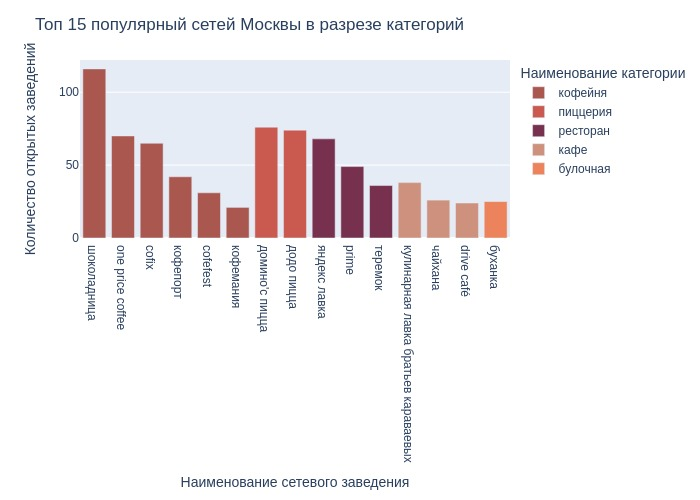

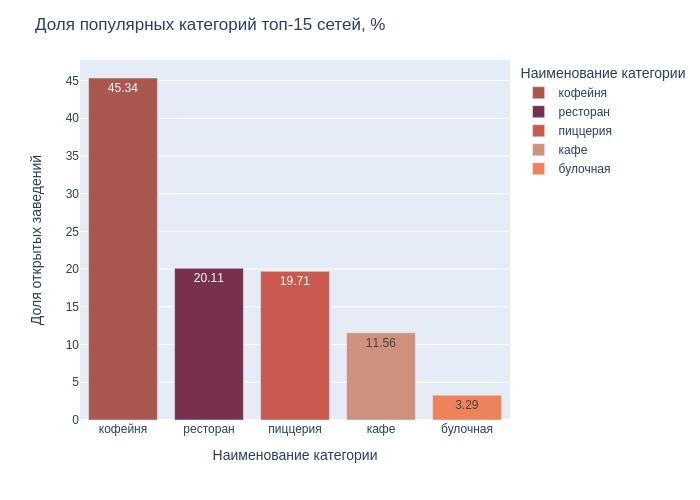

In [34]:
#таблица по доле популярых сетей

top_15_moscow = (data
                .query('chain == True')
                .groupby(['name', 'category'], as_index=False)
                .agg(count=('name', 'count'))
                .sort_values('count',ascending=False)
                .head(15)
               )

top_15_moscow_bar = px.bar(top_15_moscow,
                           x='name',
                           y='count',
                           color='category',
                           color_discrete_map=colors_category
                          )

top_15_moscow_bar.update_layout(title='Топ 15 популярный сетей Москвы в разрезе категорий',
                             legend_title='Наименование категории',
                             xaxis_title='Наименование сетевого заведения',
                             yaxis_title='Количество открытых заведений')
top_15_moscow_bar.show()

#таблица по доле популярых категорий

top_15_moscow_v2 = top_15_moscow.groupby('category', as_index=False).agg(sum=('count','sum'))
top_15_moscow_v2['ratio'] = round((top_15_moscow_v2['sum'] / top_15_moscow_v2['sum'].sum()) * 100,2)
top_15_moscow_v2 = top_15_moscow_v2.sort_values('ratio', ascending=False)


top_15_moscow_bar_v2 = px.bar(top_15_moscow_v2,
                           x='category',
                           y='ratio',
                           color='category',
                           text='ratio',
                           color_discrete_map=colors_category
                          )

top_15_moscow_bar_v2.update_layout(title='Доля популярных категорий топ-15 сетей, %',
                                 legend_title='Наименование категории',
                                 xaxis_title='Наименование категории',
                                 yaxis_title='Доля открытых заведений')

top_15_moscow_bar_v2.show()


**Промежуточный итог:** В список входит множесто популярных заведений.

Думаю, все заведения объединяет стабильная позиция на рынке, полностью сформированная бизнес-система франшиз/сетей, а также популярность среди клиентов.

На графике отражены категории: кофейня, ресторан, кафе (наиболее популярные категории, были рассмотрены выше), пиццерия, булочная.

### Количество заведений по районам Москвы

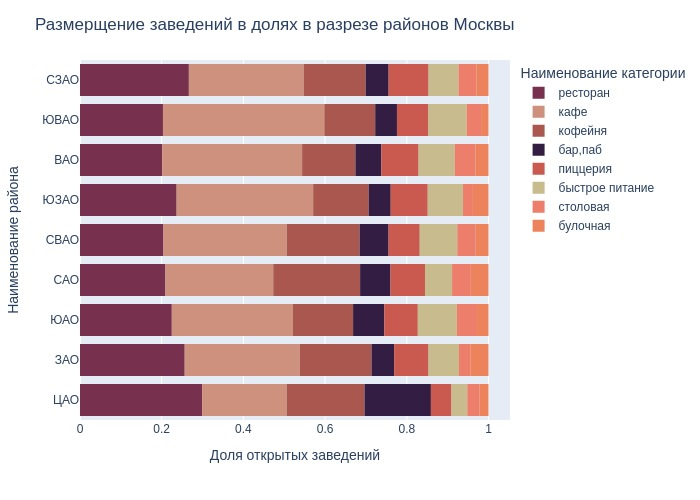

In [35]:
data_dist_gr = (data
                    .groupby(['dist_abbrev', 'category'], as_index=False)
                    .agg(count=('category', 'count'))
                    .sort_values('count', ascending=False)
                )


data_dist_pie = px.histogram(data_dist_gr,
                             x='count',
                             y='dist_abbrev',
                             color="category",
                             barnorm='fraction',
                             color_discrete_map=colors_category
                            )

data_dist_pie.update_layout(title='Размерщение заведений в долях в разрезе районов Москвы',
                                 legend_title='Наименование категории',
                                 xaxis_title='Доля открытых заведений',
                                 yaxis_title='Наименование района'

                           )

data_dist_pie.update_traces(hovertemplate='%{x}', textsrc='inside', xhoverformat='.2f'
                           )



data_dist_pie.show()

**Промежуточный итог:**
Всего округов представлено:
- ЦАО - 2241 заведений;
- СВАО - 891 заведение;
- ЮАО - 890 заведений;
- САО - 876 заведений;
- ЗАО - 831 заведение;
- ВАО - 789 заведений;
- ЮВАО - 714 заведений;
- ЮЗАО - 706 заведений;
- СЗАО - 409 заведений.

Явное лидерство у Центрального администратоивного округа. Интересно, что только в нем доминируют рестораны, во всех остальынх случаях - кафе.

В остальных райнонах примерно равное количество заведений (от 700 до 900), кроме СЗАО.

### Средний рейтинг заведений

#### Средний рейтинг заведений в разрезе категорий

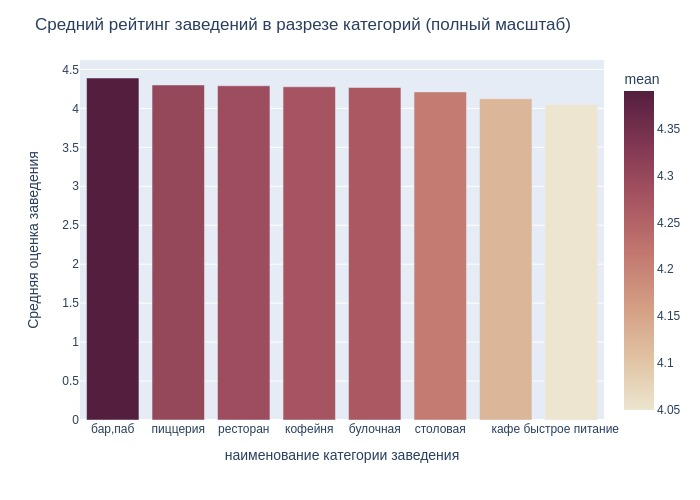

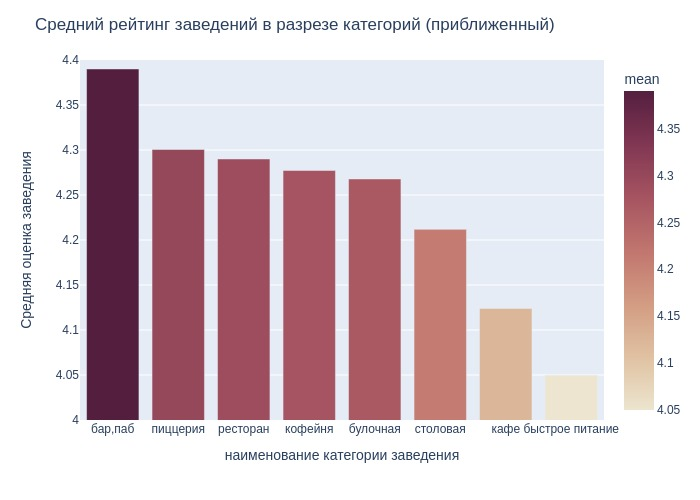

In [36]:
rating_mean = (data
                .groupby('category', as_index=False)
                .agg(mean=('rating', 'mean'))
                .sort_values('mean',ascending=False)
               )

rating_mean_bar_full_range = px.bar(rating_mean,
                y='mean',
                x='category',
                color='mean',
                color_continuous_scale=px.colors.sequential.Brwnyl
                )
rating_mean_bar_full_range.update_layout(title='Средний рейтинг заведений в разрезе категорий (полный масштаб)',
                   xaxis_title='наименование категории заведения',
                   yaxis_title='Средняя оценка заведения')

rating_mean_bar_full_range.show()

rating_mean_bar_min_range = px.bar(rating_mean,
                y='mean',
                x='category',
                color='mean',
                color_continuous_scale=px.colors.sequential.Brwnyl
                )

rating_mean_bar_min_range.update_layout(title='Средний рейтинг заведений в разрезе категорий (приближенный)',
                   xaxis_title='наименование категории заведения',
                   yaxis_title='Средняя оценка заведения')

rating_mean_bar_min_range.update_yaxes(range=[4, 4.4])

rating_mean_bar_min_range.show()

**Промежуточный итог:** минимальная средняя оценка составляет - 4.05 (быстрое питание), максимальная - 4.4 (бар, паб). Исходя из этих цифр и посмотрев на график, можно сделать вывод о том, что средние оценки у всех категорий примерно одинаковые.

#### Средний рейтинг заведений в разрезе районов Москвы

In [37]:
#карта - JSON-файл с границами округов Москвы
state_geo = 'https://code.s3.yandex.net/data-analyst/admin_level_geomap.geojson'

# moscow_lat - широта центра Москвы, moscow_lng - долгота центра Москвы
moscow_lat, moscow_lng = 55.751244, 37.618423

#создаю карту Москвы
m_rating = Map(location=[moscow_lat, moscow_lng], zoom_start=10, tiles='Cartodb Positron')


data_m_rating = data.pivot_table(index='district', values='rating', aggfunc='mean')
data_m_rating.reset_index(inplace=True)


Choropleth(
    geo_data=state_geo,
    data=data_m_rating,
    columns=['district', 'rating'],
    key_on='feature.name',
    color='rating',
    fill_opacity=0.8,
    legend_name='Средний рейтинг заведений по районам'
).add_to(m_rating)

m_rating

**Промежуточный итог:** Несмотря на то, что центр Москвы является самым популярным местом, он не является самым рейтинговым местом.

Самый низкий рейтинг у района - Восточный административный округ (рейтинг 4.1).
Самый высокий рейтинг у района - Северо-Восточный административный округ (рейтинг 4.4).

Также можно заметить, что у всей левой части Москвы рейтинг выше, чем у правой стороны и центра.

### Все заведения Москвы на карте

In [ ]:
#новая карта
m_all = Map(location=[moscow_lat, moscow_lng], zoom_start=10, tiles='Cartodb Positron')

#создаю пустой кластер, добавляем его на карту
marker_cluster = MarkerCluster().add_to(m_all)


#пишем функцию, которая принимает строку датафрейма,
#создаёт маркер в текущей точке и добавляет его в кластер
def create_clusters(row):
    Marker(
        [row['lat'], row['lng']],
        popup=f"{row['name']} {row['rating']}",
    ).add_to(marker_cluster)

#применяю функцию к каждой строке датафрейма
data.apply(create_clusters, axis=1)

#вывожу карту
m_all

**Промежуточный итог:** на карте изобразил все заведения, представленные в таблице, добавив к каждому заведению рейтинг для большей информативности.

### Топ 15 улиц по количеству заведений

In [ ]:
#список значений улиц для таблицы улица + категория

top_street = (data
                    .groupby('street')
                    .agg(count=('category', 'count'))
                    .sort_values('count', ascending=False)
                    .head(15)
                    .index.tolist()
                )

top_street_category = (
                        data[data['street'].isin(top_street)]
                        .groupby(['street', 'category'], as_index=False)
                        .agg(count=('name', 'count'))
                        .sort_values('count', ascending=False)
                       )

y_all = top_street_category.groupby('street', as_index=False).agg(sum=('count','sum'))
y_all.columns=['street','sum']

#присоединяю полную сумму, чтобы по ней отсортировать
top_street_category = top_street_category.merge(y_all, on='street', how='left')


top_street_category = top_street_category.sort_values(['sum', 'count'], ascending=[True, False])

top_street_category_bar = px.bar(
                                top_street_category,
                                x='count',
                                y='street',
                                color='category',
                                color_discrete_map=colors_category
                                )

top_street_category_bar.update_layout(title='Топ 15 улиц по количеству заведений в разрезе категорий',
                             legend_title='Категории заведений',
                             xaxis_title='Наименование улицы',
                             yaxis_title='Количество заведений')

top_street_category_bar.show()

**Промежуточный итог:** Самая популярная улица - проспект Мира - на ней находится 180 заведений (Центральный и Северо-восточные округа), в то время как самые непопулярные улицы - Миклухо-Маклая и Пятницкая улицы - до 50 заведений (Юго-Западный административный округ и Северные административные округа).

Такую популярность можно объяснить длинной улиц. Проспект Мира - длинная улица, которая занимает два административных округа, а, например, Пятницкая улица, по сравнению с проспектом Мира, занимает не так много места и находится только в одном административном округе.

Необходимо отметить, что у данных популярных улицах находятся все те же популярные три категории заведений: кофейня, ресторан и кафе.

### Улицы с одним заведением

In [ ]:
#список с названиями улиц
one_ins = (data
            .groupby('street')
            .agg(count=('name','count'))
            .query('count == 1')
            .index.tolist()
            )

#таблица с категориями
second_ins = (data[data['street'].isin(one_ins)]
                  .groupby('category', as_index=False)
                  .agg(count=('name', 'count'))
                  .sort_values('count', ascending=False)
             )

second_ins_bar = px.bar(second_ins,
                           x='count',
                           y='category',
                           color='category',
                           text='count',
                           color_discrete_map=colors_category
                          )

second_ins_bar.update_layout(title='Категории заведений на непопулярных улицах',
                             xaxis_title='Количество заведений',
                             yaxis_title='Наименование категории', showlegend=False)
second_ins_bar.show()

**Промежуточный итог:** на непопулярных улицах чаще встречаются кафе, рестораны и кофейни.

Можно предположить, что связано это с тем, что такие заведения, как столовая, бар, пиццерия и быстрое питание, открывают там, где большой поток клиентов. А кафе, ресторан и кофейни, могут открывать в местах, где нет конкурентов и без огромной проходимости.

### Анализ среднего чека в разрезе районов Москвы

In [ ]:
dist_avg_bill = (data.groupby('district', as_index=False)
                    .agg(mean=('middle_avg_bill', 'median')))

dist_avg_bill['mean'] = round(dist_avg_bill['mean'], 2)

m_avg_bill = Map(location=[moscow_lat, moscow_lng], zoom_start=10, tiles='Cartodb Positron')



Choropleth(
    geo_data=state_geo,
    data=dist_avg_bill,
    columns=['district', 'mean'],
    key_on='feature.name',
    color='mean',
    fill_opacity=0.8,
    legend_name='Средний чек заведений по районам Москвы'
).add_to(m_avg_bill)

m_avg_bill

**Промежуточный итог:** Центр Москвы - самый дорогой округ. За ним идет левая сторона Москвы, а самый низкий чек можно увидеть в правой стороне Москвы.

Думаю, если учесть, что дороже всего цены в Центре Москвы и лишь только за ним цены снижаются (судя по карте), то можно предположить, что в Моске принцип "дешевый район - дешевые цены, дорогой район - дорогие цены".

Самый дорого чек по району - до 1000 рублей, самый дешевый - до 500 рублей.

**Вывод по этапу:**

В ходе анализа данных были выявлены все категории заведений, которые представлены в таблице, и их популярность - самыми популярными категории оказались кафе, рестораны, кофейни - данные категории занимают до 70% в датасете, далее одинаковые доли делят бары и пабы, пиццерии, быстрое питание - от 7 до 9% на каждую категорию заведения, за ними идут столовые и булочные - по 3% на каждое заведение.

В Москве чаще встречаются заведения средних размеров (посадочных мест от 21 до 80) и очень больших заведений (120+ мест).

В таблице несетевых заведений - 5170, сетевых - 3177. Это говорит о том, что несетвых заведений в 1.5 раза больше сетевых.
Интересно, что сетевые места превосходят по количеству несетвые только в части категорий "кофейня" и "пиццерия", но не больше, чем на 10%.

Были проанализированы 15 популярных сетей и их категории заведений. Самые популярные категории для сетей: кофейни (345 заведений), пиццерии (150 заведений), рестораны (153 заведений).
Также прослеживается взаимосвязь сетевых заведений и таких категорий, как кофейня и пиццерия. Как описаывалось ранее, под сетью/франшизой открывается пиццерий и кофеен больше, чем без сети.

Думаю, такое связано с легкость открытия бизнеса для таких категорий (налажен бизнес-процесс, коммунация с поставщиками, давно придуманное меню, а также стабильность).

Если рассматривать количество заведений по районам, то явный лидер - Центральный административный округ, в котором находится 2241 заведений. Меньше всего заведений открыто в Северо-Западном административном округе - 409 заведений.

Оценки выше у левой стороны москвы и центра, не смотря на распределение количества заведений по районам.

Самой популярной улицей в Москве является проспект Мира, на ней находится 180 заведений и на ходится данная улица в районах ЦАО и СВАО - самые высокие оценки в данных районах.

Самые частые категории заведений на непопулярных улицах - кафе, рестораны, кофейни. Думаю, это связано с общей популярностью и легкостью открытия таких заведений.

Самый дорогой чек в Москве - в центре. Далее идет вся левая часть Москвы, за левой части идет права часть. Не думаю, что такие цены связаны с отдалением от центра, предположу, что это связано из-за устаявшейся ценовой политики районов.

## Анализ кофейнь в Москве

### Количество кофейнь в зависимости от района

Для начала создам отдельную таблицу с кофейнями.

In [ ]:
#отдельная таблица с кофейнями
data_coffee = data.query('category == "кофейня"')

display('Всего кофейн: {}'.format(data_coffee['name'].count()))

Всего в таблице кофейнь 1399.

Можно рассмотреть как заведения распределены по районам Москвы.

In [ ]:
#создаю карту Москвы
m_data_coffee_count = Map(location=[moscow_lat, moscow_lng], zoom_start=10, tiles='Cartodb Positron')

#отдельная таблица по районам мск
data_coffee_count = data_coffee.groupby('district', as_index=False).agg(count=('name', 'count'))

Choropleth(
    geo_data=state_geo,
    data=data_coffee_count,
    columns=['district', 'count'],
    key_on='feature.name',
    color='count',
    fill_opacity=0.8,
    legend_name='Количество заведений категорий "кофейня"'
).add_to(m_data_coffee_count)

m_data_coffee_count

**Промежуточный итог:** самый конкурируемый и проходимый район - Центральный административный округ.

Самые перспективные районы для открытия: Юго-Восточный, Юго-Западный, Северо-Западные административные округа. В данных округах октрыто меньше всего заведений.

### Количество круглосуточных кофейнь

Для начала построим столбчатый график, в котором отобразим количество круглосуточных и некруглосуточных заведений.

In [ ]:
is_24_7_count = (data_coffee
                 .groupby(by=['dist_abbrev', 'is_24/7'], as_index=False)
                 .agg(count=('name', 'count'))
                 .sort_values('count', ascending=False)
                 .replace([True,False],['Круглосуточное','Некруглосуточное'])
                )

is_24_7_bar = px.bar(
                    is_24_7_count,
                    x='dist_abbrev',
                    y='count',
                    text='count',
                    color='is_24/7',
                    color_discrete_map={'Круглосуточное':'#77314e',
                                        'Некруглосуточное':'#d59e7b'}
                    )

is_24_7_bar.update_layout(title='Соотношения круглосуточных и некруглосуточных заведений в районах Москвы',
                             legend_title='Заведение круглосуточное?',
                             xaxis_title='Наименование административного округа',
                             yaxis_title='Количество заведений')

is_24_7_bar.show()

**Промежуточный итог:** круглосуточные кофейни в датасете есть, но их слишком мало для какого-либо анализа и подведения итогов.

Возможно, открытие круглосуточной кофейни - хорошее решение на фоне конкурентов.

### Рейтинг кофейнь

In [ ]:
#создаю карту Москвы
m_coffee_rating = Map(location=[moscow_lat, moscow_lng], zoom_start=10, tiles='Cartodb Positron')


data_coffee_rating = data_coffee.groupby('district', as_index=False).agg(mean=('rating','mean'))

Choropleth(
    geo_data=state_geo,
    data=data_coffee_rating,
    columns=['district', 'mean'],
    key_on='feature.name',
    color='rating',
    fill_opacity=0.8,
    legend_name='Средний рейтинг кофейнь по районам'
).add_to(m_coffee_rating)

m_coffee_rating

**Промежуточный итог:** В Центральном и Северо-Западном районах высокие оценки - максимум 4.34.

Как рекомендацию можно рассмотреть районы с низким рейтингом и низким количеством заведений (рассмотрено выше), такой район, как Западный административный округ - низкий рейтинг (медиана 4.2), ниже среднего количество заведений.

Также можно обратить внимание на другие районы, где оценки немного ниже средних (~4.24):
- Восточный административный округ;
- Юго-Восточный административный округ;
- Северный административный округ;

### Стоимость чашки капучино при открытии

In [ ]:
#определяю цвет для всех столбцов
color = ['rgb(211,211,211)',] * 9

#выделяю цвета другим цветом
color[2] = 'rgb(0, 204, 151)'
color[-4] = 'rgb(0, 204, 151)'
color[-1] = 'rgb(0, 204, 151)'



data_coffee_mean = (data_coffee
                    .groupby('dist_abbrev', as_index=False)
                    .agg(mean=('middle_coffee_cup', 'median'))
                    .sort_values('mean', ascending=False)
                   )
data_coffee_mean['mean'] = round(data_coffee_mean['mean'],2)

data_coffee_mean_bar = go.Figure(data=[go.Bar(
    x=data_coffee_mean['dist_abbrev'],
    y=data_coffee_mean['mean'],
    marker_color=color,
    text=data_coffee_mean['mean'])])

data_coffee_mean_bar.update_layout(title='Средняя цена чашки капучино в разере районов Москвы, руб.',
                             xaxis_title='Наименование района',
                             yaxis_title='Стоимость чашки капучино')




data_coffee_mean_bar.show()

**Промежуточный итог:** на графике выделил столбцы с районами, которые рекомендовал ранее.

Интересно, что самый дорогой кофе находится в Юго-Западном административном округе, а не в Цветральном. Цена в данном районе достигает 200 рублей!

Стоит отметить, что цену можно выбирать чуть ниже средней для привлечения новых клиентов. Для ЗАО это может быть 170-180 рублей, для САО - 140-150 рублей, ВАО 120-130 рублей.

**Вывод по этапу:** всего в таблице представлено 1399 заведений с категорией "кофейня".

Чаще всего кофейни встречаются в центре Москвы, а самые перспективные районы для открытия: Юго-Восточный, Юго-Западный, Северо-Западные административные округа, так как в этих районах меньше всего заведений, но перед таким выводом обратим внимание на рейтинги заведений в данных районов.

Район с низким рейтингом, в котором можно конкурировать с кофейнями - Западный административный округ - низкий рейтинг.


Средняя цена чашки капучино:
- Максимум достигает до 198 рублей - Юго-Западный административный округ;
- Средняя цена варьируется от 150 до 180 рублей;
- Минимальная цена 135 рублей - Восточный административный округ.

Круглосуточных заведений слишком мало для анализа, максимум 25 круглосуточных заведений при 427 заведений всего - это центр Москвы. В других районах максимум достигает 9 круглосуточных заведений.




**Рекомендации к открытию кофейни:**

1. Рекомендую открыть кофейню в районе с низким рейтингом или маленьким количеством аналогичных открытых заведений:
- Западный административный округ - низкий рейтинг, ниже среднего количество заведений;
- Восточный административный округ - ниже среднего рейтинг, ниже среднего количество заведений;
- Северный административный округ - ниже среднего рейтинг, наименьшее количество заведений.

  Так будет больше возможности для открытия тематической или простой и доступной кофейни.
2. Рекомендую использовать более низкие цены, чем средние цены чашки капучино у районов, где будет открываться заведения. Это поможет привлечь клиентов и конкурировать с самого начала открытия.

    Если рассматривать предложенные районы, то цены можно установить следующие:
- Западный административный округ - 170-180 рублей;
- Северный административный округ - 140-130 рублей;
- Восточный административный округ - 120-140 рублей.

3. Рекомендую открыть круглосуточную кофейню, так как пользуются популярностью такие заведния только в Москве, для другого района это может стать отличительной особенностью.
    
    Всего круглосуточных кофейнь в районах:
- Западный административный округ - 9 круглосуточных из 146 (0.06%);
- Юго-Западный административный округ - 7 круглосуточных из 96 (0.07%);
- Северо-Западный административный округ - 2 круглосуточных из 62 (0.03%);
- Юго-Восточный административный округ - 1 круглосуточный из 89 (0.01%).

**Вывод по проекту:**

Проект разбит на 4 этапа, из них:

**Первый этап - ознакомление:**
1. Ознакомление с первыми данными;
2. Всего заведений представлено 8406;
3. Неправильныый тип данных в колонке `chain`.

**Второй этап - предобработка данных:**
1. Изменение типа данных в колонке `chain`;
2. Изучение и анализ пропусков в датасете:
- `middle_coffe_cup` - 95%;
- `middle_avg_bill` - 62%;
- `price` - 60%;
- `avg_bill` - 54%;
- `seats` - 42%.
Пропуски не были удалены и обработаны, из-за особенности таблицы (множество категориальных значений, зависящих друг от друга) и большого количества пустых значений.
3. Были проанализированы дубликаты:
- полных дубликатов в таблице не обнаружено;
- Дубликаты названий - 3506;
- Дубликаты названий и категорий - 2933;
- Дубликаты названий, категорий и координат - 2 - такие дубликаты были удалены.
Остальные дубликаты не были предобработаны, так как такие дубликаты чаще связаны с сетями заведений или популярными и простыми названиями заведений, такие как "Шарума", "Кафе" и так далее.
4. Были удалены аномальные значения в разных колоноках. Всего аномальных значений - 0.6%.
5. Добавлены новые колонки для анализа данных:
- Название улицы;
- Обозначение круглосуточного заведения;
- Аббревиатура района Москвы.

**Третий этап - анализ всех заведений Москвы:**
1. Всего категорий представлено 8: кафе, ресторан, кофейня, бар и паб, пиццерия, быстрое питание, столовая, булочная.
2. Самые популярные из категорий:
- Кафе - 28%;
- Ресторан - 24%;
- кофейня - 16%.
3. Чаще всего в Москве встречаются заведения средних (21-80 мест) и очень больших размеров (120+ мест).
4. В таблице представлено больше несетвых мест, их в 1.5 больше, чем сетевых. Но у сетей есть преимущество по количесту заведений кофейнь, пиццерий и булочных в 5-10%.

5. Больше всего заведений в Москве в Центральном административном округе, из заведений преимущественно кофейни, рестораны и кафе.

6. Самый высокий рейтинг заведений у Северо-Восточного округа (5.0), а самый низкий у Восточного административного округа.

7. Самая популярная улица - проспект Мира - на ней находится 180 заведений (Центральный и Северо-восточные округа).
    Самые непопулярные улицы - Миклухо-Маклая и Пятницкая улицы - до 50 заведений (Юго-Западный административный округ и Северные административные округа).

8. Самый дорогой чек в Центре Москвы, далее идет левая сторона Москвы (цени ниже на 10-20%), а самые дешевые районы в правой стороне Москвы(цены ниже на 15-20%).

**Четвертый этап - анализ кофейнь:**

1. Всего кофейнь в датасете - 1399;
2. Чаще всего кофейни встречаются в Центральном административном округе (до 400 кофейнь).  
    Юго-Восточный, Юго-Западный, Северо-Западные административные округа - до 100 кофейнь (ниже в 4 раза) - самые низкие по количеству кофейнь районы.

3. Круглосуточных кофейнь слишком мало в Москве (менее 1% в районах).

4. Рейтинги в районах:
- Западный административный округ - самый низкий рейтинг - 4.2;
- Центральный и Северо-Западный административный округ - самый высокий рейтинг - 4.34;
- Все остальные районы - рейтинг ~4.3.

**Рекомендации к открытию кофейни в Москве:**

Для открытия кофейни стоит рассмотреть районы с низким рейтингов заведений/кофейнь для более простого конкурирования между другими заведениями.

Также стоит отметить количество открытых заведений в районах или улицах: чем меньше заведений в районе, тем легче занять нишу.

Из таких районов и улиц можно рассмотреть:
- Западный административный округ - низкий рейтинг - 4.2, ниже среднего количество заведений - до 150;
- Северный административный округ - ниже среднего рейтинг - 4.24, ниже среднего количество заведений - до 100;
- Восточный административный округ - ниже среднего рейтинг - 4.24, наименьшее количество заведений - до 100;
- Пятницкая улица(Северный район) - оценка средняя - 4.4, всего заведений 50.

Для назначения цены при открытии стоит учитывать средние цены по районам и для привлечения новых клиентов можно занизить цены на 5-10%.

Интересно, что в одном из предложенных районах Москвы - Западном - одна из самых высоких цен чашки капучино - 187 рублей, поэтому для этого района можно использовать цену в 170-180 рублей за чашку капучино.

В среднем ценовом диапазоне находятся Северный и Южный районы с диапозоном цен от 160 до 166, поэтому для них можно использовать цены 150-160 рублей за чашку капучино.

Для размеров кофейни подойдет 20-80 посадочных мест - такие кофейни пользуются популярностью, а также можно рассмотреть открытие круглосуточной кофейни, так как в таблице такие в меньшестве (менее 1% в каждом районе).

**Презентация:** <https://drive.google.com/file/d/1ikyJqRyNpEPH-6i45kdym0_ma_Uzsyo4/view?usp=share_link>